# PokeMon Classification 
  - Rupesh kumar
  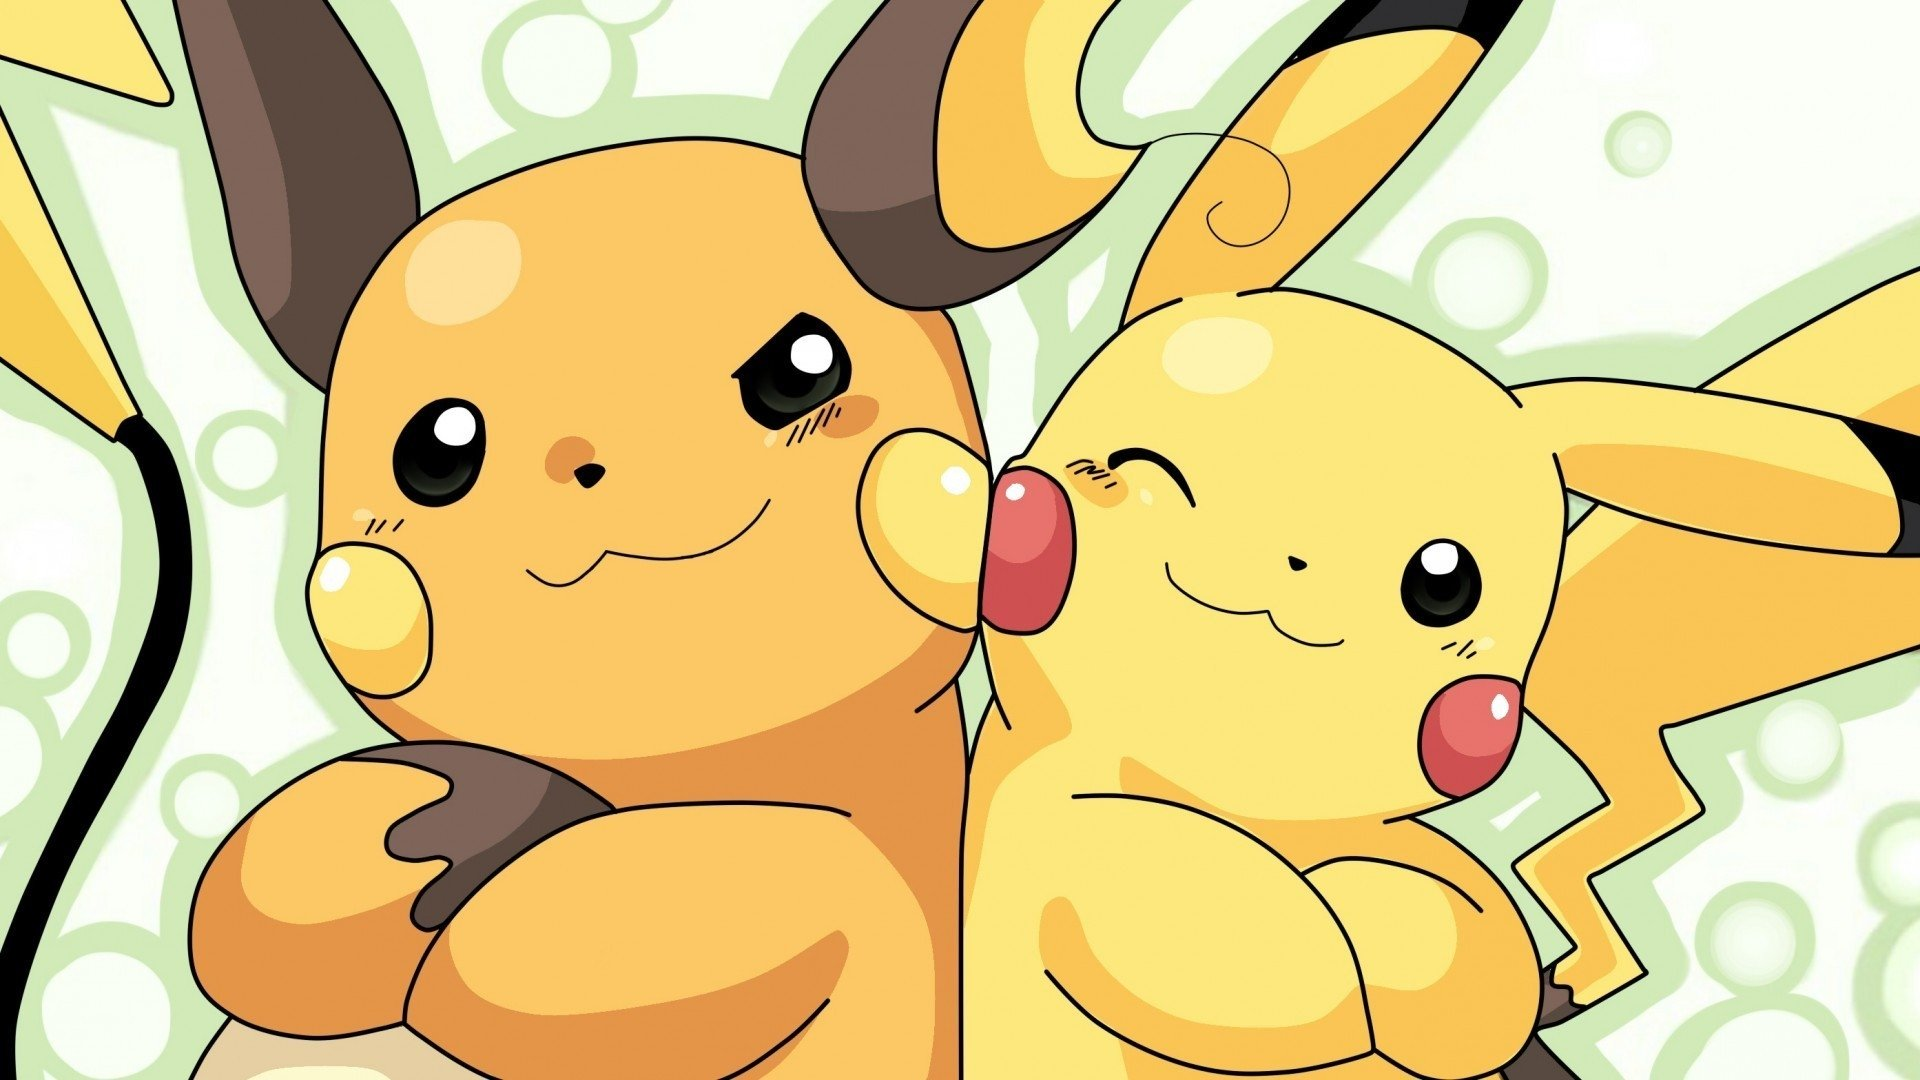

# Problem Statement - 
    - Given a Dataset (collection of images of different types of pokemon). We have to classify these pokemon on basis of images.

# Dataset Descryption - 

   - Dataset contains several folders which represents different types of pokemon.
   - Each folder contain more than 100 images.

In [ ]:
path = 'D:\pokemon-dataset\dataset'

In [ ]:
!pip install keras

# Importing Necessary Library : 

In [ ]:
import tensorflow

In [ ]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

## Accessing dataset

In [ ]:
path  = Path('D:\pokemon-dataset\dataset')

freq = []

for dirs in path.glob("*"):
  cnt = 0
  for imgs in dirs.glob("*.jpg"):
    cnt = cnt+1
  freq.append((cnt, dirs))

freq = np.array(freq)
# print(freq)
srt = sorted(freq, key = lambda x: x[0], reverse = True)
print(srt)


[array([200, WindowsPath('D:/pokemon-dataset/dataset/Charmander')],
      dtype=object), array([199, WindowsPath('D:/pokemon-dataset/dataset/Pikachu')],
      dtype=object), array([192, WindowsPath('D:/pokemon-dataset/dataset/Mewtwo')],
      dtype=object), array([186, WindowsPath('D:/pokemon-dataset/dataset/Squirtle')],
      dtype=object), array([176, WindowsPath('D:/pokemon-dataset/dataset/Bulbasaur')],
      dtype=object), array([158, WindowsPath('D:/pokemon-dataset/dataset/Psyduck')],
      dtype=object), array([130, WindowsPath('D:/pokemon-dataset/dataset/Spearow')],
      dtype=object), array([122, WindowsPath('D:/pokemon-dataset/dataset/Fearow')],
      dtype=object), array([107, WindowsPath('D:/pokemon-dataset/dataset/Dratini')],
      dtype=object), array([97, WindowsPath('D:/pokemon-dataset/dataset/Aerodactyl')],
      dtype=object), array([83, WindowsPath('D:/pokemon-dataset/dataset/Rapidash')],
      dtype=object), array([81, WindowsPath('D:/pokemon-dataset/dataset/Shellde

In [ ]:
srt[0]

array([200, WindowsPath('D:/pokemon-dataset/dataset/Charmander')],
      dtype=object)

# Extracting folder from dataset 
    - particular folder conatains images of same type of pokemon

In [ ]:
X_data = []
Y_data = []

for ix in range(len(srt)):
  label = str(srt[ix][1])
  label = label[27:]
  print(label)
#   break
  for imgs in srt[ix][1].glob("*.jpg"):
    img_d = image.load_img(imgs, target_size=(96,96))
    img_a = image.img_to_array(img_d)
    img_x = img_a.flatten()
    X_data.append(img_x)
    Y_data.append(label)
    

Charmander
Pikachu
Mewtwo
Squirtle
Bulbasaur
Psyduck
Spearow
Fearow
Dratini
Aerodactyl
Rapidash
Shellder
Pidgey
Ninetales
Lapras
Machamp
Mankey
Raichu
Sandslash
Marowak
Meowth
Muk
Raticate
Primeape
Rhyhorn
Snorlax
Growlithe
Kingler
Nidoking
Vaporeon
Electrode
Exeggutor
Golbat
Gyarados
Kakuna
Lickitung
Mew
Rattata
Seadra
Tauros
Vileplume
Vulpix
Butterfree
Dewgong
Oddish
Pidgeot
Ponyta
Sandshrew
Scyther
Venusaur
Wigglytuff
Charmeleon
Dodrio
Dragonair
Hitmonlee
Kabutops
Koffing
Metapod
Nidoqueen
Seaking
Venomoth
Dugtrio
Farfetchd
Golem
Grimer
Jigglypuff
Jolteon
Krabby
Onix
Voltorb
Arbok
Haunter
Horsea
Nidorino
Pidgeotto
Pinsir
Poliwhirl
Poliwrath
Slowbro
Tangela
Weezing
Dragonite
Hypno
Kangaskhan
Moltres
Poliwag
Arcanine
Blastoise
Hitmonchan
Seel
Wartortle
Drowzee
Gengar
Golduck
Kadabra
Magnemite
Slowpoke
Staryu
Clefairy
Cloyster
Flareon
Magikarp
Magmar
Rhydon
Starmie
Weedle
Zapdos
Cubone
Gloom
Goldeen
Jynx
Magneton
MrMime
Nidorina
Chansey
Exeggcute
Graveler
Persian
Tentacool
Articuno
Geo

In [ ]:
X_data = np.array(X_data)
Y_data = np.array(Y_data)


In [ ]:
print(X_data.shape, Y_data.shape)


(10120, 27648) (10120,)


In [ ]:
from sklearn.utils import shuffle

In [ ]:
Xn_data, Yn_data = shuffle(X_data, Y_data)

## Converting images into vector

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Yn_data = le.fit_transform(Yn_data)

print(Yn_data)

[41  3 60 ... 93  2 33]


## Shape of data

In [ ]:
print(Xn_data.shape, Yn_data.shape)

(10120, 27648) (10120,)


In [ ]:
from sklearn.model_selection import train_test_split


# Splitting data for training and testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Xn_data, Yn_data, test_size = 0.2)


In [ ]:
from sklearn.metrics import accuracy_score

# Applying Machine Learning Model - 
  1. Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train,y_train)

y_pred_lr = lr.predict(x_test)

score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)

print(score_lr)

D:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


16.8


In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
lc = learning_curve(lr, x_test, y_test)

D:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [ ]:
print(lc)

(array([ 161,  526,  890, 1254, 1619]), array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.99809886, 1.        , 1.        , 1.        , 1.        ],
       [0.9988764 , 0.9988764 , 1.        , 0.9988764 , 0.9988764 ],
       [0.9984051 , 0.99760766, 0.99920255, 0.9984051 , 0.9984051 ],
       [0.998147  , 0.99691167, 0.998147  , 0.99752934, 0.99752934]]), array([[0.0345679 , 0.04197531, 0.04444444, 0.05679012, 0.02227723],
       [0.05679012, 0.05925926, 0.05185185, 0.0691358 , 0.03712871],
       [0.06666667, 0.07901235, 0.08395062, 0.0617284 , 0.0470297 ],
       [0.06666667, 0.08395062, 0.07407407, 0.0691358 , 0.06188119],
       [0.08395062, 0.08641975, 0.08395062, 0.10617284, 0.07178218]]))


In [ ]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


D:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

<module 'matplotlib.pyplot' from 'D:\\Users\\ACER\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

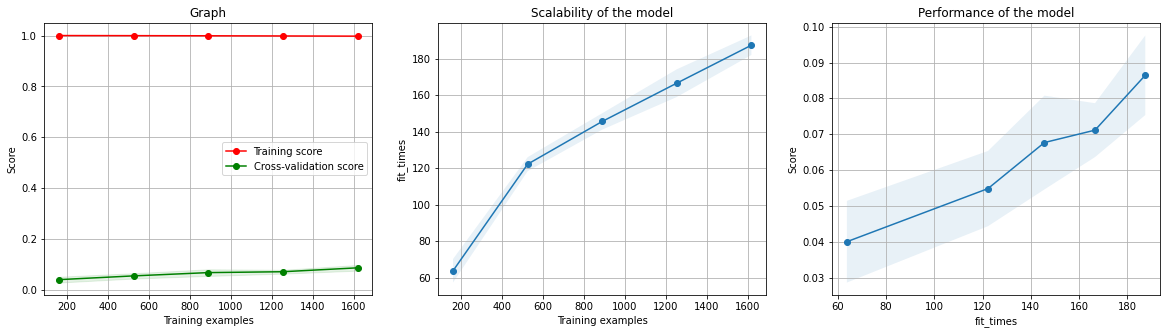

In [ ]:
plot_learning_curve(lr, "Graph", x_test, y_test)


2. KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)

print(score_knn)


8.99


2. SVM (Support Vector Machine)

In [ ]:
from sklearn import svm

sv = svm.SVC(decision_function_shape='ovo')

sv.fit(x_train, y_train)

y_pred_svm = sv.predict(x_test)

score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)

print(score_svm)

13.19


4. Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train, y_train)

y_pred_svm = gnb.predict(x_test)

score_svm = round(accuracy_score(y_pred_svm, y_test)*100,2)

print(score_svm)


5.34
